In [14]:
from les.les import les_desc_comp, les_dist_comp
import numpy as np
import h5py
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [48]:
CONV_LAYERS = [f'conv{i}' for i in range(1,6)]
VIS_LAYERS = ['VISp','VISl','VISam','VISpm','VISal', 'VISrl']
DOMAINS = ['ImageNet','Real','Clipart','Painting','Infograph','Sketch','Quickdraw','Cremi']

In [29]:
with h5py.File('../domain_rep/assets/model_activations/model_activations_AIVC_rep1.hdf5','r') as f:
    model_activations = {domain:{layer:np.array(f[domain]['AIVC'][layer]) for layer in f[domain]['AIVC'].keys()} for domain in f.keys()}
model_activations

{'Clipart': {'conv1': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.18093675, ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.01328249, 0.        , ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.01288456, 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.07810992, 0.05322163, 0.08476602, ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32),
  'conv2': array([[4.04877  , 3.3646448, 3.1894011, ..., 0.       , 0.       ,
          0.       ],
         [4.0356045, 3.291698 , 2.9959378, ..., 0.       , 0.       ,
          0.       ],
         [4.0090475, 3.3946831, 3.2622273, ..., 0.       , 0.       ,
          0.       ],
         ...,
         [4.1287656, 3.5252628, 3.0544074, ..., 0.       , 0. 

In [42]:
with h5py.File('../domain_rep/assets/neural_datasets/filtered_calcium_data.hdf5','r') as f:
    vis_activations = {layer:{specimen:np.array(f[layer]['average'][specimen]) for specimen in f[layer]['average'].keys()} for layer in f.keys()}
vis_activations

{'VISal': {'222420': array([[0.        , 0.27289412, 0.00176168, ..., 0.00241716, 0.02361105,
          0.00592822],
         [0.00441401, 0.10109996, 0.00283621, ..., 0.00176803, 0.05242433,
          0.00619189],
         [0.02141497, 0.14517747, 0.00135942, ..., 0.        , 0.03435431,
          0.00203134],
         ...,
         [0.12116559, 0.03115839, 0.        , ..., 0.01626965, 0.        ,
          0.        ],
         [0.        , 0.55406031, 0.        , ..., 0.        , 0.01952936,
          0.        ],
         [0.01321909, 0.0800476 , 0.00609918, ..., 0.00441516, 0.19356092,
          0.        ]]),
  '222426': array([[0.        , 0.        , 0.00160284, ..., 0.        , 0.00260465,
          0.        ],
         [0.00650979, 0.00153066, 0.0093201 , ..., 0.00190895, 0.00227807,
          0.0013727 ],
         [0.00868288, 0.010297  , 0.00623437, ..., 0.00434307, 0.00430613,
          0.00151199],
         ...,
         [0.01985937, 0.        , 0.00181396, ..., 0.009386

In [4]:
dist_mat = np.zeros((5,5))
for i in range(1,6):
    for j in range(1,6):
        les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
        les_desc_x1 = les_desc_comp(activations['ImageNet'][f'conv{i}'], SIGMA, NEV, GAMMA)
        les_desc_x2 = les_desc_comp(activations['ImageNet'][f'conv{j}'], SIGMA, NEV, GAMMA)
        dist_mat[i-1,j-1]=les_dist_comp(les_desc_x1, les_desc_x2)

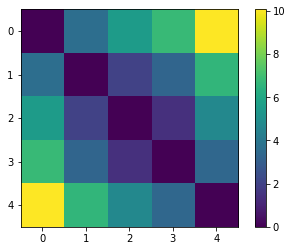

In [5]:
plt.imshow(dist_mat)
plt.colorbar()

In [6]:
domain_dist_mat = []
labels = []
for k,domain in enumerate(activations.keys()):
    dist_mat = np.zeros((5,5))
    domain_activations = activations[domain]
    for i in range(1,6):
        for j in range(1,6):
            les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
            les_desc_x1 = les_desc_comp(domain_activations[f'conv{i}'], SIGMA, NEV, GAMMA)
            les_desc_x2 = les_desc_comp(domain_activations[f'conv{j}'], SIGMA, NEV, GAMMA)
            dist_mat[i-1,j-1]=les_dist_comp(les_desc_x1, les_desc_x2)
    domain_dist_mat.append(dist_mat)

In [7]:
print(domain_dist_mat[0])

[[3.75458977e-14 4.94439266e+00 9.17157032e+00 1.32676754e+01
  1.66449504e+01]
 [4.94439266e+00 6.21677311e-14 4.30716775e+00 8.44357654e+00
  1.18545481e+01]
 [9.17157032e+00 4.30716775e+00 1.13451539e-13 4.18481169e+00
  7.61205569e+00]
 [1.32676754e+01 8.44357654e+00 4.18481169e+00 1.99563384e-13
  3.48020838e+00]
 [1.66449504e+01 1.18545481e+01 7.61205569e+00 3.48020838e+00
  3.18615826e-13]]


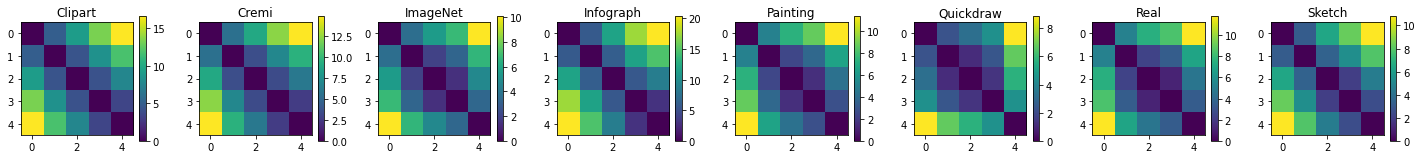

In [13]:
fig,axs = plt.subplots(1,len(domain_dist_mat),figsize=(20,10))
for k,domain in enumerate(activations.keys()):
    mat = axs[k].imshow(domain_dist_mat[k])
    axs[k].set_title(domain)
    fig.colorbar(mat, ax=axs[k],fraction=0.05)
fig.tight_layout()

In [15]:
# pairwise_dists = np.array(35,35)
# for i, domain1 in tqdm(enumerate(activations.keys())):
#     activations_d1 = activations[domain1]
#     for j, domain2 in tqdm(enumerate(activations.keys())):
#         activations_d2 = activations[domain2]
#         for m in range(1,6):
#             activations_d1_l1 = activations_d1[f'conv{m}']
#             for n in range(1,6):
#                 activations_d2_l2 = activations_d2[f'conv{n}']
#                 les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
#                 les_desc_x1 = les_desc_comp(activations_d1_l1, SIGMA, NEV, GAMMA)
#                 les_desc_x2 = les_desc_comp(activations_d2_l2, SIGMA, NEV, GAMMA)
#                 dists.append(les_dist_comp(les_desc_x1, les_desc_x2))
#     pairwise_dists.append(dists)

In [16]:
# pairwise_dists = []
# ind_i=0
# for i, domain1 in tqdm(enumerate(activations.keys())):
#     activations_d1 = activations[domain1]
#     for m in range(1,6):
#         activations_d1_l1 = activations_d1[f'conv{m}']
#         dists = []
#         for j,domain2 in tqdm(enumerate(activations.keys())):
#             activations_d2 = activations[domain]
#             for n in range(1,6):
#                 activations_d2_l2 = activations_d2[f'conv{n}']
#                 les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
#                 les_desc_x1 = les_desc_comp(activations_d1_l1, SIGMA, NEV, GAMMA)
#                 les_desc_x2 = les_desc_comp(activations_d2_l2, SIGMA, NEV, GAMMA)
#                 les_dist = les_dist_comp(les_desc_x1, les_desc_x2)
#                 dists.append(les_dist)
#                 print(f'LES distance between {domain1}-conv{m} and {domain2}-conv{n}:{les_dist}')
#         pairwise_dists.append(dists)        
# print(len(pairwise_dists))

In [17]:
pairwise_dists = []
for i in range(1,6):
    layerwise_dists = []
    for domain1 in activations.keys():
        activations1 = activations[domain1][f'conv{i}']
        dists = []
        for domain2 in activations.keys():
            activations2 = activations[domain2][f'conv{i}']
            les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
            les_desc_x1 = les_desc_comp(activations1, SIGMA, NEV, GAMMA)
            les_desc_x2 = les_desc_comp(activations2, SIGMA, NEV, GAMMA)
            les_dist = les_dist_comp(les_desc_x1, les_desc_x2)
            dists.append(les_dist)
    #         print(f'LES distance between {domain1}-conv{conv_layer} and {domain2}-conv{conv_layer}:{les_dist}')
        layerwise_dists.append(dists)
    layerwise_dists = np.array(layerwise_dists)
    pairwise_dists.append(layerwise_dists)

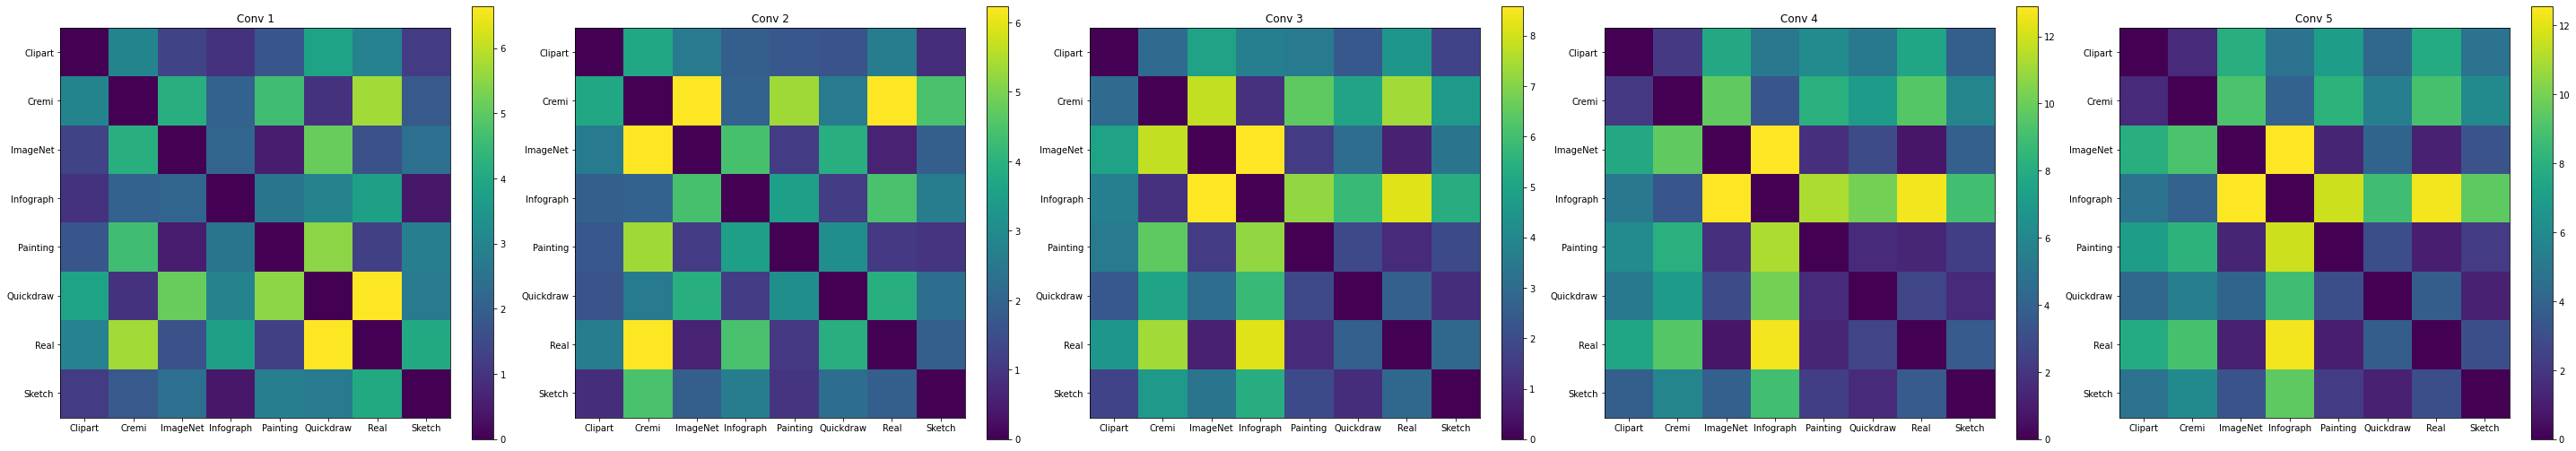

In [22]:
fig,axs = plt.subplots(1,5,figsize=(40,10))
for i in range(5):
    mat = axs[i].imshow(np.array(pairwise_dists[i]))
    fig.colorbar(mat,ax=axs[i],fraction=0.05)
    axs[i].set_xticks(ticks=np.arange(len(pairwise_dists[i])),labels=activations.keys())
    axs[i].set_yticks(ticks=np.arange(len(pairwise_dists[i])),labels=activations.keys())
    axs[i].set_title(f'Conv {i+1}')
fig.tight_layout()

In [ ]:
pairwise_dists = []
labels = []
for domain1 in activations.keys():
    activations_d1 = activations[domain1]
    for domain2 in activations.keys():
        activations_d2 = activations[domain2]
        domainwise_dists = []
        for i in range(1,6):
            activations_d1_l1 = activations_d1[f'conv{i}']
            dists = []
            for j in range(1,6):
                activations_d2_l2 = activations_d2[f'conv{j}']
                les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
                les_desc_x1 = les_desc_comp(activations_d1_l1, SIGMA, NEV, GAMMA)
                les_desc_x2 = les_desc_comp(activations_d2_l2, SIGMA, NEV, GAMMA)
                les_dist = les_dist_comp(les_desc_x1, les_desc_x2)
                dists.append(les_dist)
            domainwise_dists.append(np.array(dists))
        domainwise_dists = np.array(domainwise_dists)
        pairwise_dists.append(domainwise_dists)
        labels.append(f'{domain1} vs {domain2}')
np.array(pairwise_dists).shape

In [26]:
np.array(pairwise_dists).shape

(64, 5, 5)

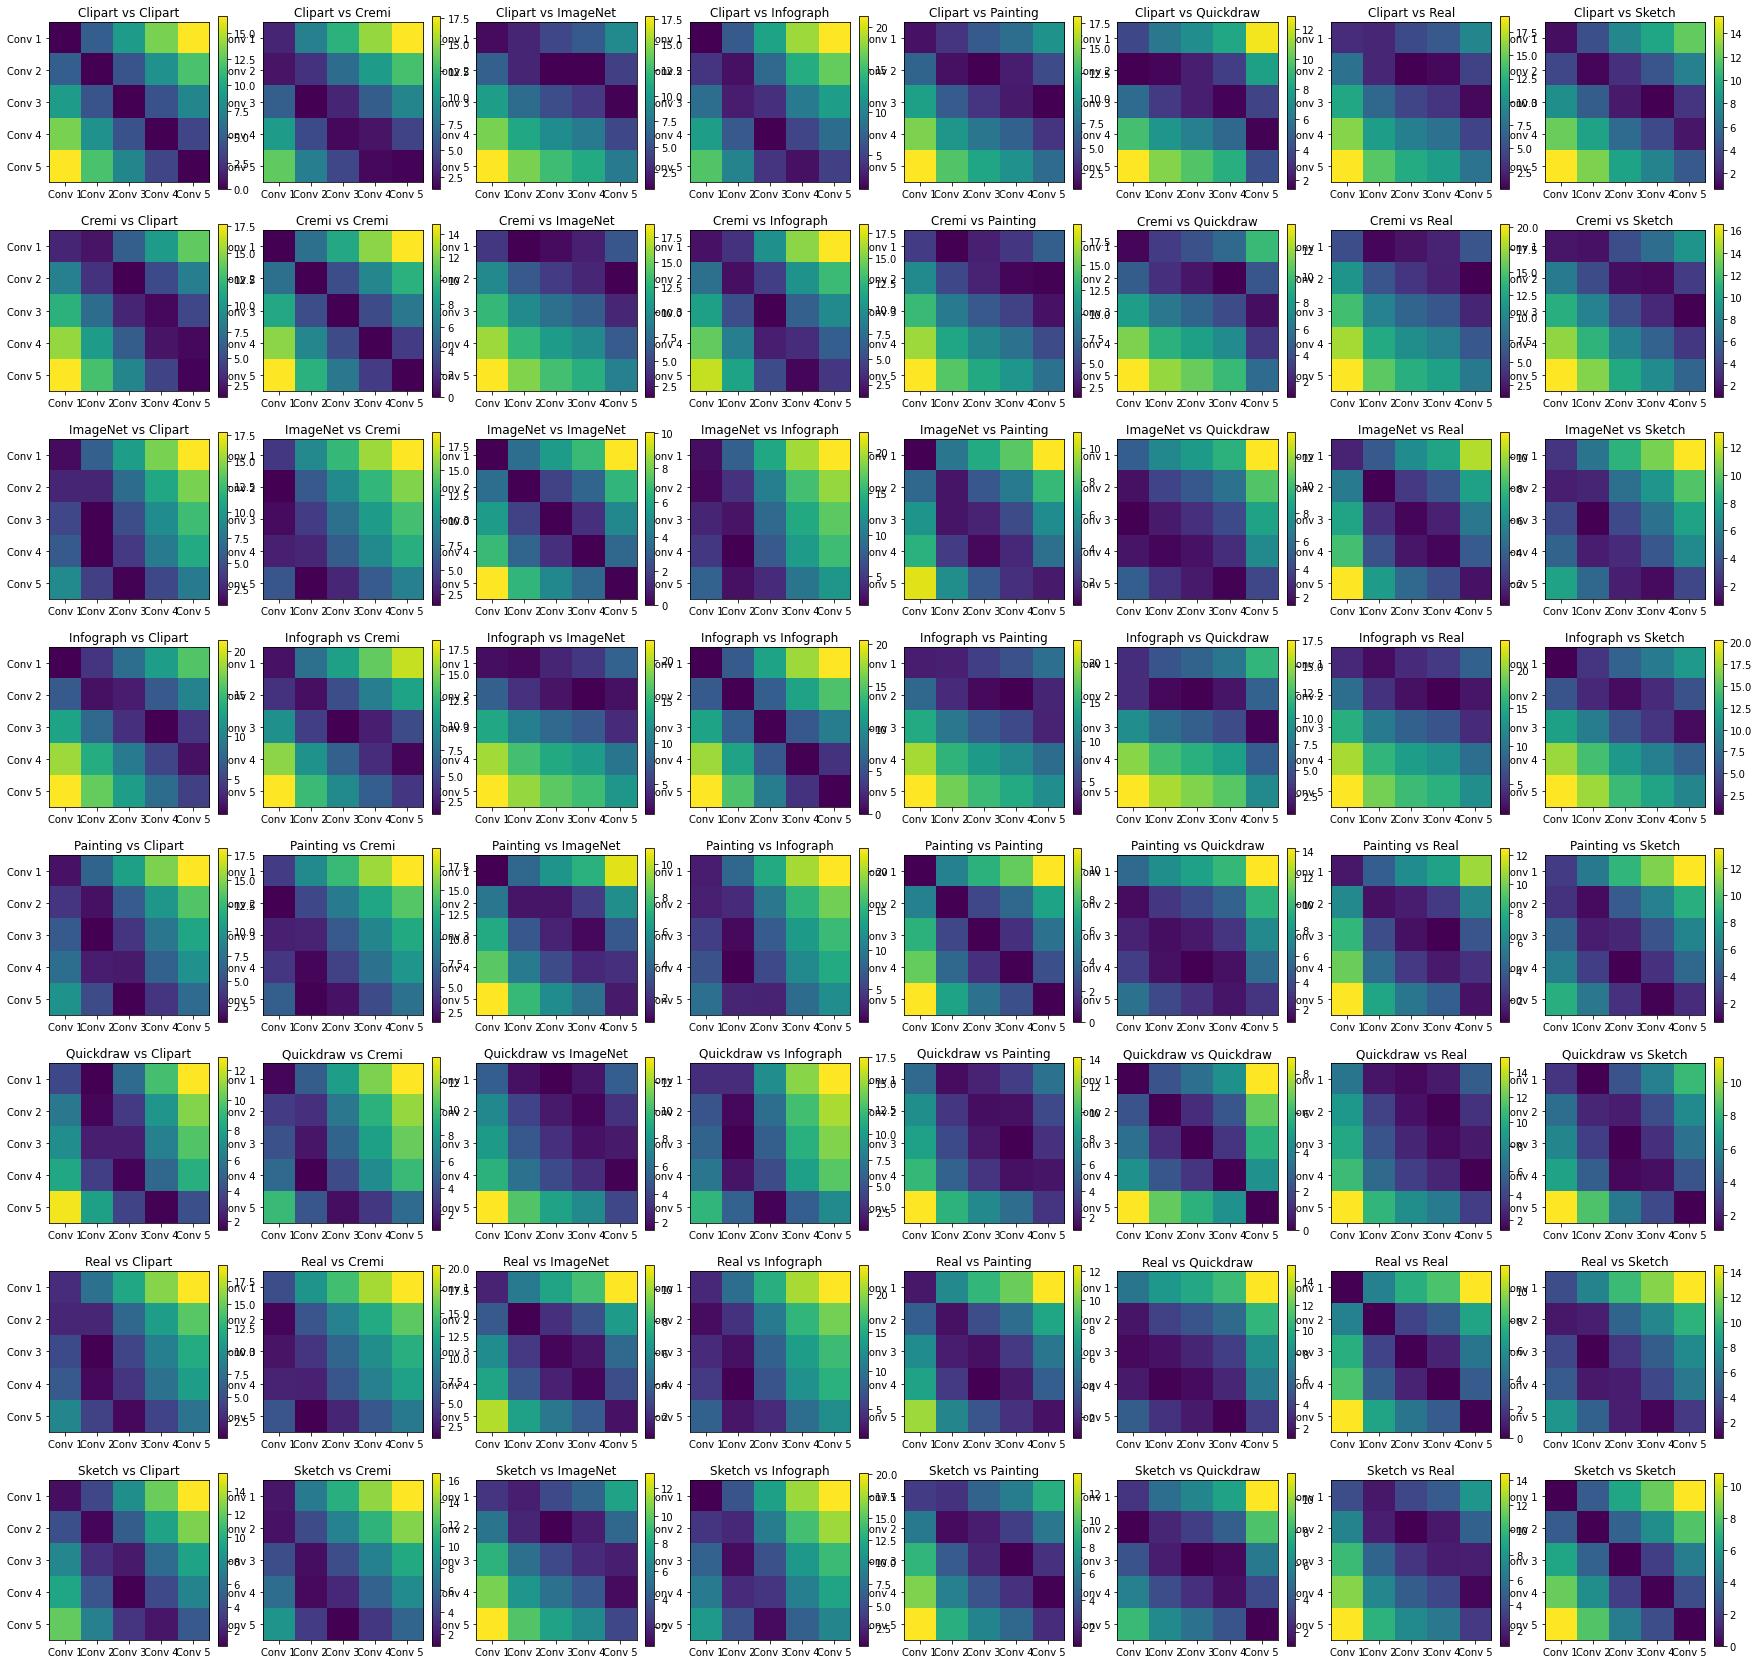

In [27]:
fig,axs = plt.subplots(int(np.sqrt(len(pairwise_dists))),int(np.sqrt(len(pairwise_dists))),figsize=(30,30),facecolor='white')
ind = 0
for i,domain1 in enumerate(activations.keys()):
    for j,domain2 in enumerate(activations.keys()):
        mat = axs[i,j].imshow(np.array(pairwise_dists[ind]))
        fig.colorbar(mat,ax=axs[i,j],fraction=0.05)
        axs[i,j].set_xticks(ticks=np.arange(5),labels=[f'Conv {i}' for i in range(1,6)])
        axs[i,j].set_yticks(ticks=np.arange(5),labels=[f'Conv {i}' for i in range(1,6)])
        axs[i,j].set_title(labels[ind])
        ind+=1

In [49]:
labels=[]

for k,domain in enumerate(activations.keys()):
    for layer in range(1,6):
        labels.append(k)

In [39]:
from sklearn.manifold import MDS

In [51]:
dists_embed = MDS(n_components=2,dissimilarity='precomputed').fit_transform(pairwise_dist_mat)
dists_embed.shape

(50, 2)

In [49]:
layerwise_dists = []
for layer in tqdm(VIS_LAYERS):
    vis_pairwise_dists = []
    for specimen1 in vis_activations[layer].keys():
        dists = []
        vis_activations1 = vis_activations[layer][specimen1]
        for specimen2 in vis_activations[layer].keys():
            vis_activations2 = vis_activations[layer][specimen2]
            les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
            les_desc_x1 = les_desc_comp(vis_activations1, SIGMA, NEV, GAMMA)
            les_desc_x2 = les_desc_comp(vis_activations2, SIGMA, NEV, GAMMA)
            les_dist = les_dist_comp(les_desc_x1, les_desc_x2)
            dists.append(les_dist)
        vis_pairwise_dists.append(np.array(dists))
    layerwise_dists.append(vis_pairwise_dists)
len(layerwise_dists)

  0%|          | 0/6 [00:00<?, ?it/s]

6

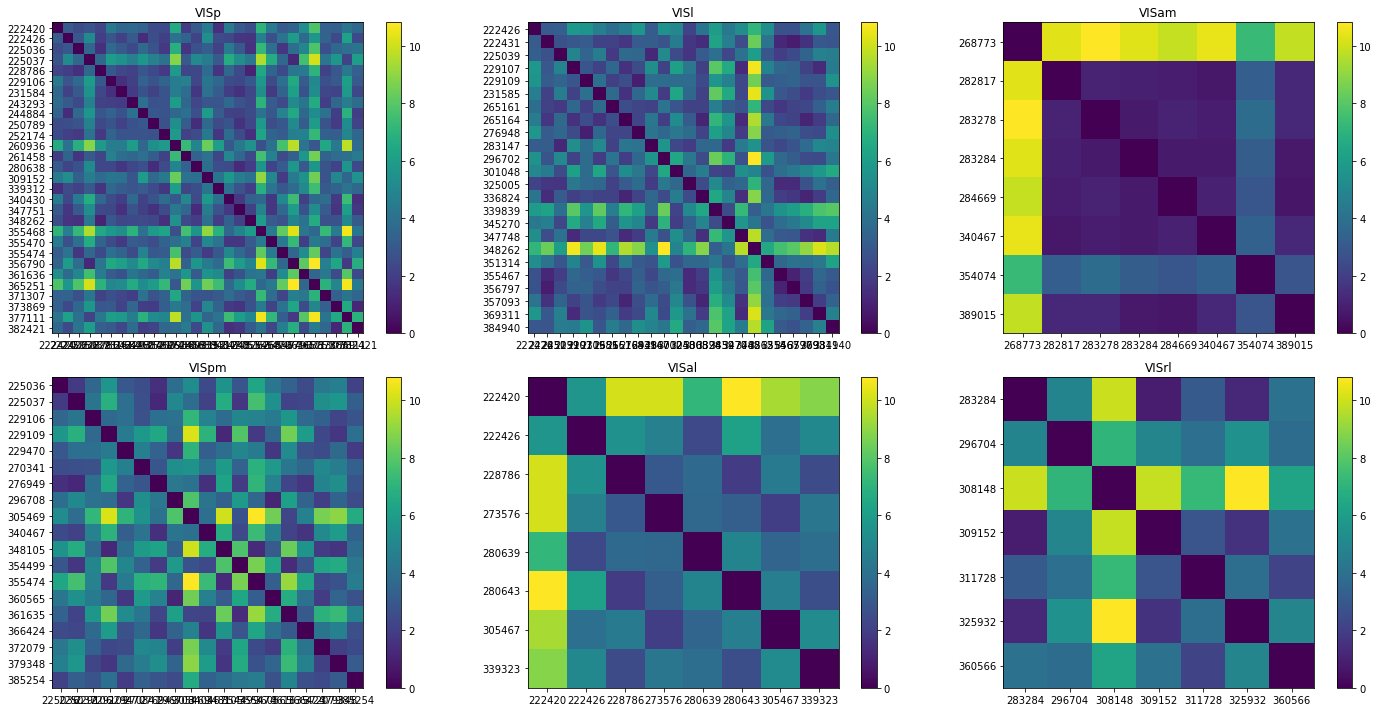

In [59]:
fig,axs = plt.subplots(2,3,figsize=(20,10))
counter = 0
for i in range(2):
    for j in range(3):
        axs[i,j].imshow(layerwise_dists[counter])
        fig.colorbar(mat,ax=axs[i,j],fraction=0.05)
        axs[i,j].set_title(VIS_LAYERS[counter])
        axs[i,j].set_xticks(ticks=np.arange(len(vis_activations[VIS_LAYERS[counter]].keys())),labels=[specimen for specimen in vis_activations[VIS_LAYERS[counter]].keys()])
        axs[i,j].set_yticks(ticks=np.arange(len(vis_activations[VIS_LAYERS[counter]].keys())),labels=[specimen for specimen in vis_activations[VIS_LAYERS[counter]].keys()])
        counter +=1
fig.tight_layout()

In [66]:
perlayer_pairwise_dists = []
for layer1 in tqdm(VIS_LAYERS):
    layer_pairwise_dists = []
    for layer2 in tqdm(VIS_LAYERS):
        for specimen1 in vis_activations[layer1].keys():
            dists = []
            spec_activations1 = vis_activations[layer1][specimen1]
            for specimen2 in vis_activations[layer2].keys():
                spec_activations2 = vis_activations[layer2][specimen2]
                les_desc = SIGMA, NEV, GAMMA = 2, 200, 1e-8
                les_desc_x1 = les_desc_comp(spec_activations1, SIGMA, NEV, GAMMA)
                les_desc_x2 = les_desc_comp(spec_activations2, SIGMA, NEV, GAMMA)
                les_dist = les_dist_comp(les_desc_x1, les_desc_x2)
                dists.append(les_dist)
            layer_pairwise_dists.append(np.array(dists))
        perlayer_pairwise_dists.append(layer_pairwise_dists)
len(perlayer_pairwise_dists)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

36

/tmp/ipykernel_94/156111079.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mat = axs[i,j].imshow(np.array(perlayer_pairwise_dists[ind]))


TypeError: Image data of dtype object cannot be converted to float

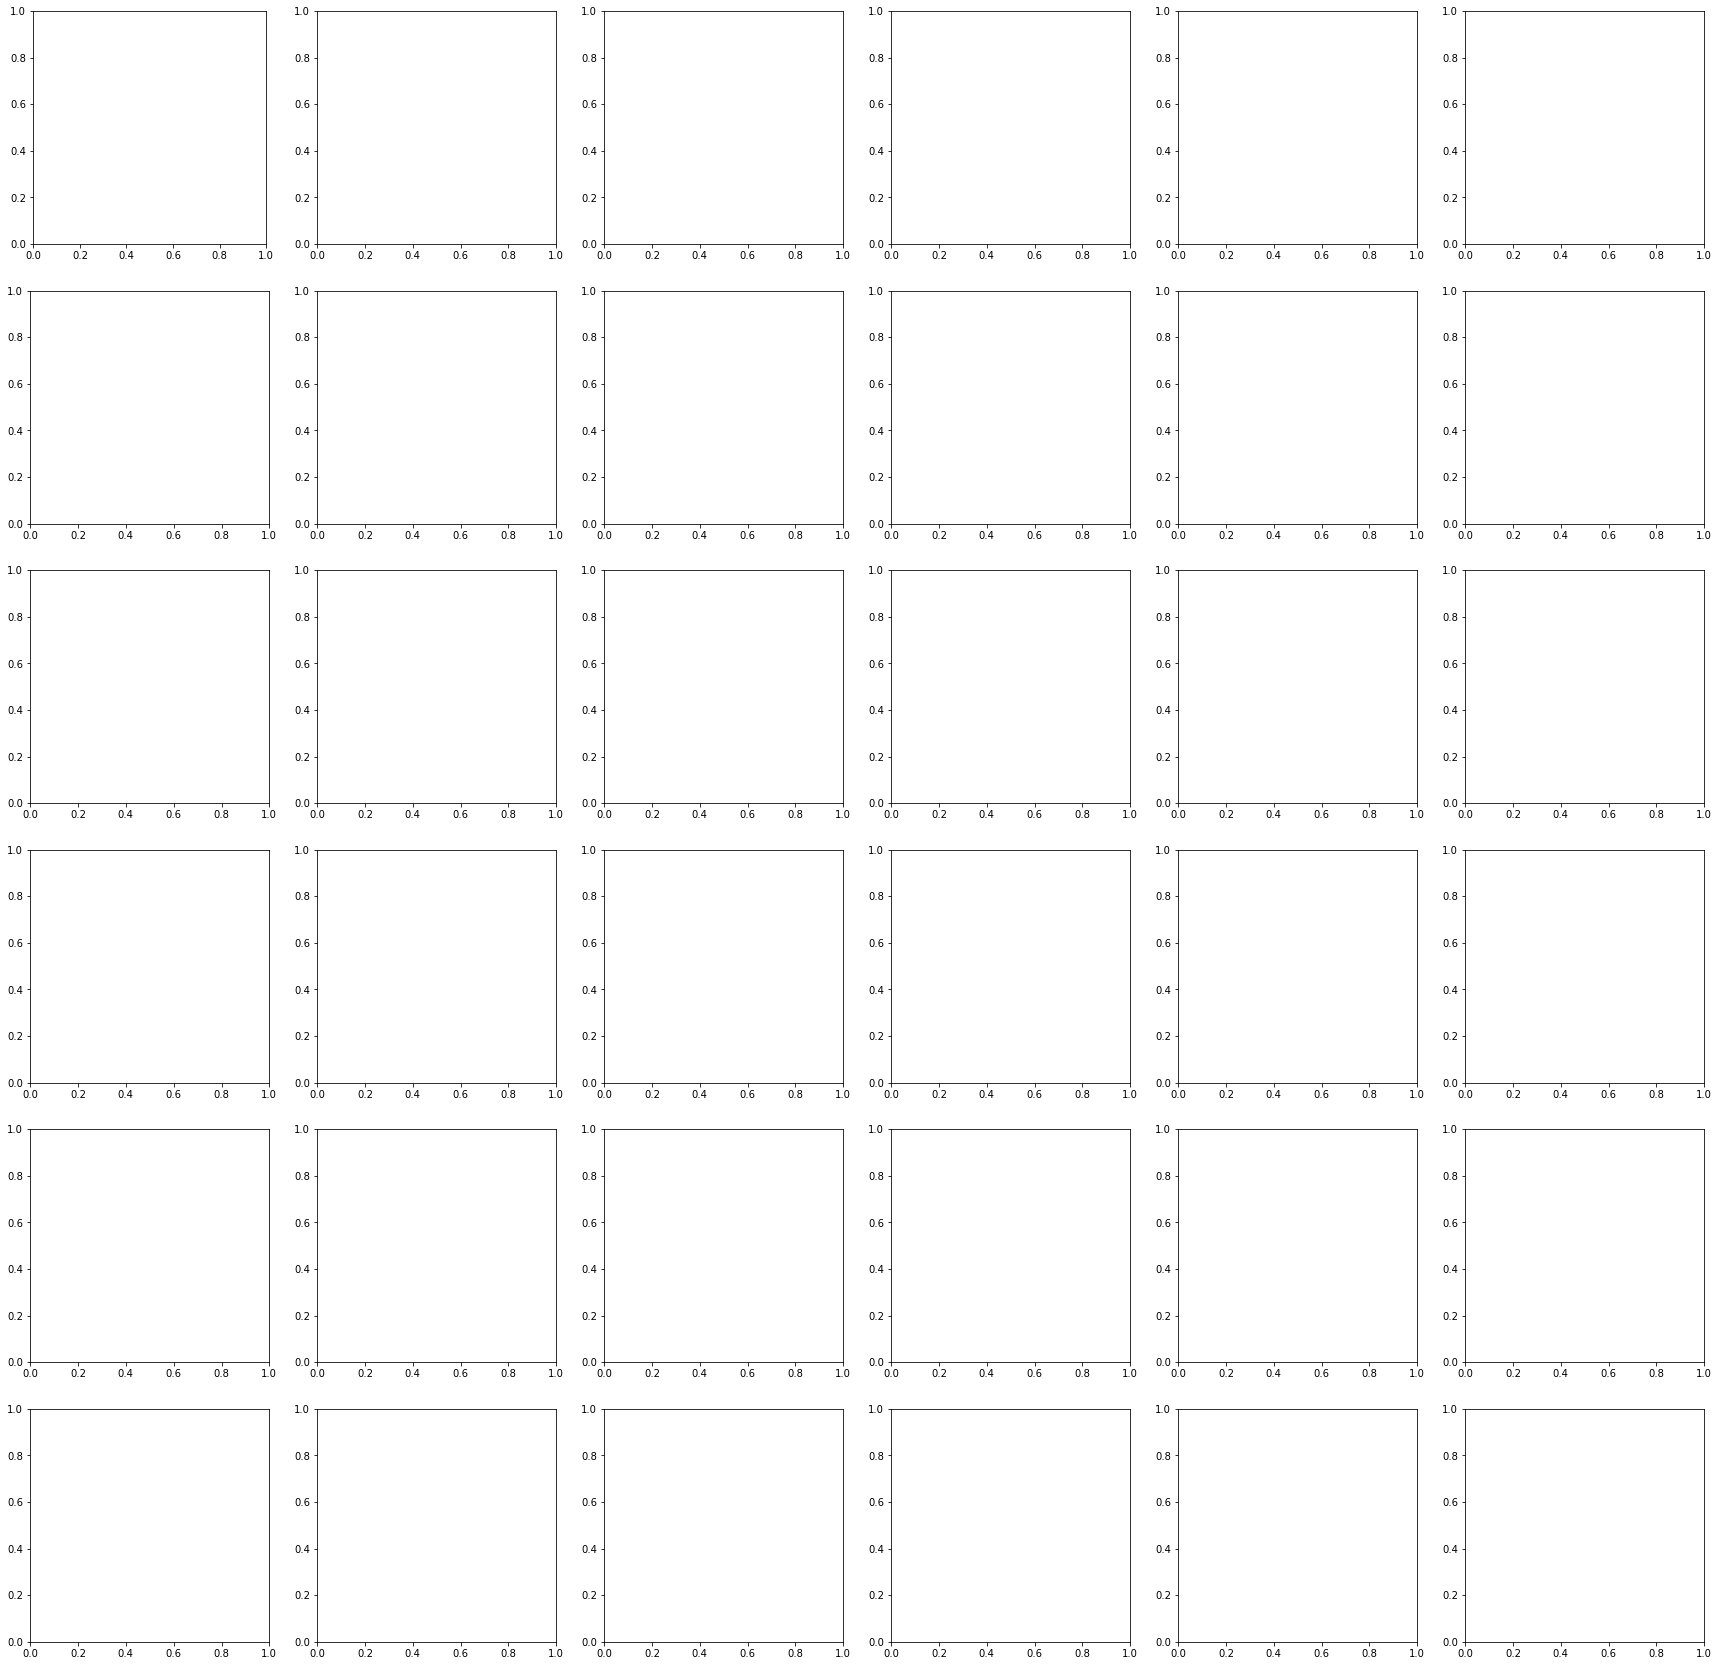

In [68]:
fig,axs = plt.subplots(int(np.sqrt(len(perlayer_pairwise_dists))),int(np.sqrt(len(perlayer_pairwise_dists))),figsize=(30,30),facecolor='white')
ind = 0
for i in range(int(np.sqrt(len(perlayer_pairwise_dists)))):
    for j in range(int(np.sqrt(len(perlayer_pairwise_dists)))):
        mat = axs[i,j].imshow(np.array(perlayer_pairwise_dists[ind]))
        fig.colorbar(mat,ax=axs[i,j],fraction=0.05)
        axs[i,j].set_xticks(ticks=np.arange(5),labels=[f'Conv {i}' for i in range(1,6)])
        axs[i,j].set_yticks(ticks=np.arange(5),labels=[f'Conv {i}' for i in range(1,6)])
        axs[i,j].set_title(labels[ind])
        ind+=1